In [51]:
import numpy as np
import pandas as pd
data=pd.read_csv("merged_data.csv")
data_2022=pd.read_csv("2022_quarte4.csv")

In [52]:
import matplotlib as mpl
import seaborn as sb
data = data_2022.sort_values(by='difference', ascending=True)

In [48]:
data=data_2022.head(10)

In [53]:
data=data.head(10)

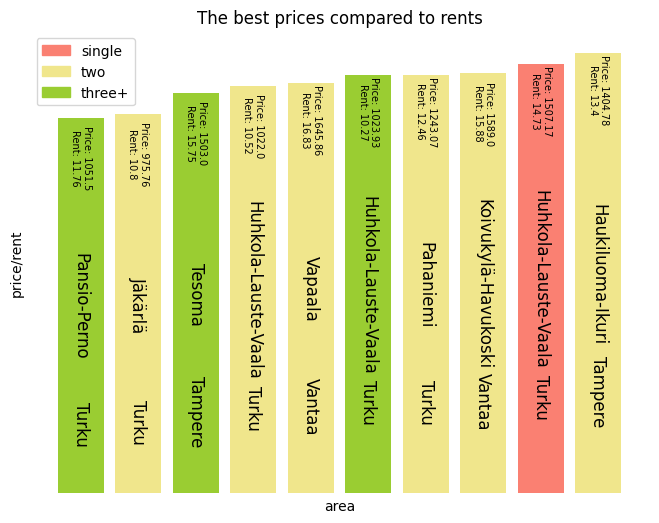

In [68]:
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.patches import Patch


colors = {'Yksiöt': 'salmon', 'Kaksiot': 'khaki', 'Kolmiot+': 'yellowgreen'}
#data=data_2022.head(10)
# Extract data for plotting
huoneluku = data['Huoneluku']
difference = data['difference']
price = data['Neliöhinta (EUR/m2)']
rent = data['Neliövuokra (eur/m2)']
kaupunginosa_x = data['Kaupunginosa_x'] 
kaupunki = data['Kaupunki'] 
# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate through rows to plot bars and add labels
for i, (h, diff, p, r, ks, k) in enumerate(zip(huoneluku, difference, price, rent, kaupunginosa_x, kaupunki)):
    bar_color = colors.get(h, 'gray')
    ax.bar(i, diff, color=bar_color, label='Facts')
    ax.text(i, diff -17, f'Price: {p}\nRent: {r}', ha='center', va='bottom', fontsize=7, rotation=-90)

    # Add "temp" text centered inside the bar and rotated 90 degrees
    ax.text(i, diff / 2, ks, ha='center', va='center', fontsize=12, rotation=-90)
    ax.text(i, diff / 2-28, k, ha='center', va='center', fontsize=12, rotation=-90) #, fontname='comicsans')

# Add labels and titles
ax.set_xlabel('area')
ax.set_ylabel('price/rent')
ax.set_title('The best prices compared to rents')
#ax.set_xticks(np.arange(len(data)))
#ax.set_xticklabels(huoneluku)
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x and y tick lines
ax.tick_params(axis='both', which='both', length=0)
#ax.legend()

legend_elements = [Patch(color='salmon', label='single'),
                   Patch(color='khaki', label='two'),
                   Patch(color='yellowgreen', label='three+')]

ax.legend(handles=legend_elements, loc='upper left')

# Display the bar plot
plt.show()